# Importing Libraries

In [7]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Reading Dataset

In [4]:
tracks = pd.read_csv('datasetForSQL/tracks.csv')
tracks.head(1)

,Unnamed: 0,id,track_popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,02MBhqgR7WeeI4ZfB6Lo0i,0,False,0.574,0.669,7.0,-7.877,1.0,0.0375,0.311,0.0,0.391,0.693,116.491,224133.0,4.0


In [5]:
albums = pd.read_csv('datasetForSQL/albums.csv')
albums.head(1)

,Unnamed: 0,track_id,track_number,album_type,album_name,release_date,label,album_popularity,album_id
0,0,6mN8nzCXWUeT5LWEcG1Utx,5,album,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2


In [6]:
artists = pd.read_csv('datasetForSQL/artists.csv')
artists.head(1)

,Unnamed: 0,id,name,artist_popularity,artist_genres,followers,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6
0,0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,['minneapolis punk'],184,minneapolis punk,NaN,NaN,NaN,NaN,NaN,NaN


# Finding Model
Finding weekly valance

# Clustering

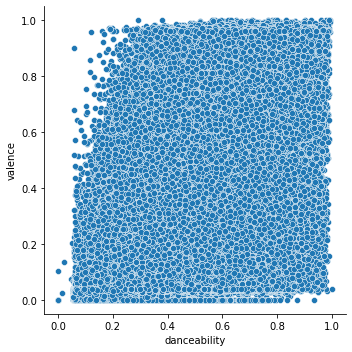

In [10]:
#maybe decision tree on this???
_ = sns.relplot(x='danceability', y='valence', data=tracks)

In [20]:
test

,danceability,valence
0,0.574,0.693
1,0.456,0.392
2,0.923,0.881
3,0.807,0.941
4,0.714,0.971
...,...,...
438933,0.847,0.220
438934,0.679,0.486
438935,0.808,0.937
438936,0.787,0.130


In [21]:
test = tracks[['danceability','valence']]
test = test.dropna()

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(test)
kmeans.cluster_centers_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.31675147, 0.16307966],
       [0.66880091, 0.74499426],
       [0.63207437, 0.3533871 ]])

C:\Users\nikol\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\nikol\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


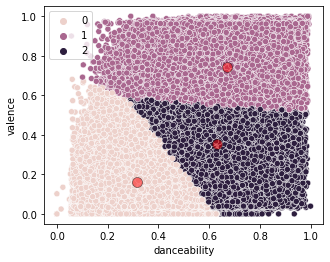

In [25]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='danceability', y='valence', hue=kmeans.labels_, data=test)
_ = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                    c='red', edgecolor='black', alpha=0.5, s=100)

# Decision Trees

In [57]:
decision_tracks = tracks[['danceability','energy','acousticness','instrumentalness']]
decision_tracks = decision_tracks.dropna()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(decision_tracks.loc[:, 'energy':'instrumentalness'],
                                                    decision_tracks['danceability'],
                                                    test_size=0.25,
                                                    random_state=42)

In [59]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

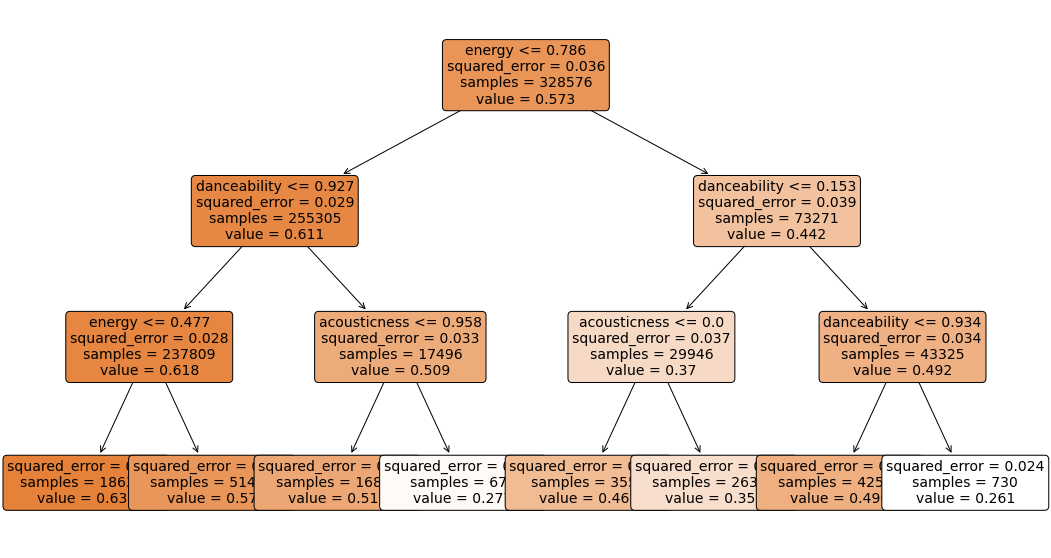

In [60]:
from sklearn import tree

plt.figure(figsize=(18, 10))
_ = tree.plot_tree(decision_tree, 
                   feature_names=decision_tracks.columns[:-1],
                   filled=True, rounded=True, fontsize=14)